In [2]:
!pip install -e .

Obtaining file:///C:/Users/aaristov/Documents/data-compression/nd2shrink


  Running command git clone -q https://github.com/aaristov/pims_nd2.git 'C:\Users\aaristov\AppData\Local\Temp\pip-install-bidlghog\pims-nd2'


  Using cached numpy-1.18.1-cp38-cp38-win32.whl (10.8 MB)
  Using cached scipy-1.4.1-cp38-cp38-win32.whl (27.9 MB)
  Using cached opencv_python-4.2.0.32-cp38-cp38-win32.whl (24.2 MB)
  Using cached scikit_image-0.16.2-cp38-cp38-win32.whl (25.0 MB)
  Cloning https://github.com/aaristov/pims_nd2.git to c:\users\aaristov\appdata\local\temp\pip-install-bidlghog\pims-nd2
  Using cached pytest-5.3.5-py3-none-any.whl (235 kB)
  Using cached tifffile-2020.2.16-py3-none-any.whl (130 kB)
  Using cached tqdm-4.43.0-py2.py3-none-any.whl (59 kB)
  Using cached PyWavelets-1.1.1-cp38-cp38-win32.whl (4.1 MB)
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Using cached Pillow-7.0.0-cp38-cp38-win32.whl (1.8 MB)
  Using cached matplotlib-3.1.3-cp38-cp38-win32.whl (8.9 MB)
  Using cached imageio-2.8.0-py3-none-any.whl (3.3 MB)
  Using cached PIMS-0.4.1-py3-none-any.whl (81 kB)
  Using cached py-1.8.1-py2.py3-none-any.whl (83 kB)
  Using cached more_itertools-8.2.0-py3-none-any.whl (43 kB)
  Using 

In [15]:
from nd2_combine import tools, segment
import numpy as np
import logging
import os
logging.basicConfig(level=logging.DEBUG)

logger = logging.getLogger()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
path = r"Z:\Sebastien\mESC_aggregates\SUMO\23_01_2020\D_5\Chip_1.nd2"

In [ ]:
path = '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_1.nd2'

In [4]:
dirr = path.replace('.nd2','')
try:
    os.mkdir(dirr)
except FileExistsError:
    pass

In [19]:
import pims_nd2 as nd

def read_nd2(path:str, bundle_axes='yx', pos_limit=None, well_index=None):
    logger.debug(f'read_nd2: open {path}')
    with nd.ND2_Reader(path,) as frames:
        logger.debug(frames.sizes)
        # logger.debug(frames.metadata)
        px_size_um = frames.calibration
        frames.iter_axes = 'm'
        frames.bundle_axes = bundle_axes
        if well_index is not None:
            return frames[well_index]

In [28]:
well = read_nd2(path, well_index=3)

/Users/andrey/miniconda3/envs/nd2/lib/python3.8/site-packages/pims/base_frames.py:522: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


Frame([[12646, 12937, 13025, ...,  8311,  8110,  7780],
       [12264, 13045, 12559, ...,  8384,  8178,  7692],
       [12030, 12651, 12422, ...,  8137,  7997,  7731],
       ...,
       [14086, 14966, 14637, ...,  6819,  6771,  6444],
       [14158, 14783, 15113, ...,  6818,  6807,  6206],
       [14007, 14746, 15040, ...,  6749,  6512,  6449]], dtype=uint16)
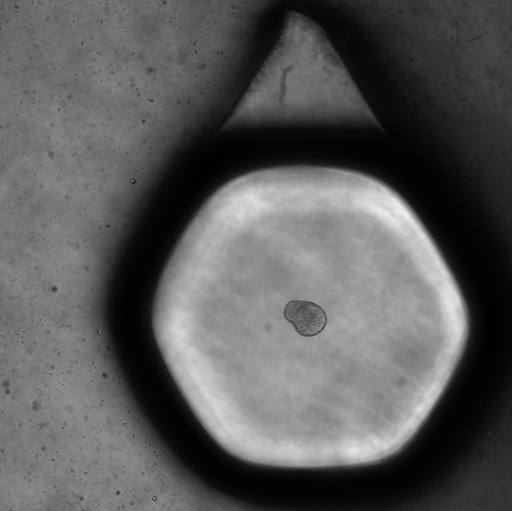

In [29]:
well

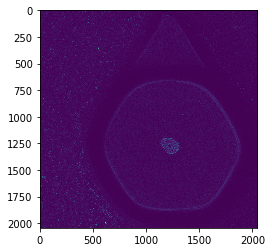

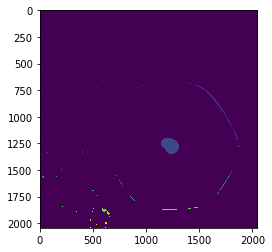

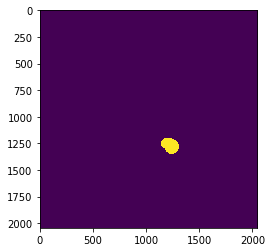

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
segment.findSpheroid(well, erode=10, threshold=0.2, plot=1)

In [62]:
def process(img, index=0, save=True, dirr=dirr):
    index = img["index"]
    print(f'Processing {index} well')
    seg = segment.findSpheroid(
        img['well'], 
        threshold=0.3,
        erode=5,
        sigma=5, 
        lim_major_axis_length=(50, 300), 
        plot=0)
    if save:
        stack = np.array([img['well'], seg], dtype='uint16')
        well = tools.Well(stack, order='cyx', calibration_um=img['calibration_um'])
        well.save_tif(os.path.join(dirr, f'Pos_{index:03d}.tif'))
    res = segment.get_props(seg, well_index=index)
    
    print(res)
    if len(res) > 1:
        res = res[np.argmax([a['area'] for a in res])]
    
        print(res)
        return res
    elif len(res) == 1:
        return res[0]
    else:
        return {'well_index': index}

In [63]:
reader = tools.read_nd2(path)

In [64]:
res = list(map(process, tools.tqdm(reader)))

/Users/andrey/miniconda3/envs/nd2/lib/python3.8/site-packages/pims/base_frames.py:522: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


Processing 0 well
[]
Processing 1 well
[{'area': 1061, 'eccentricity': 0.8875643105055699, 'major_axis_length': 87.10969915371032, 'well_index': 1}, {'area': 19333, 'eccentricity': 0.7834937206624811, 'major_axis_length': 200.33356492118685, 'well_index': 1}]
{'area': 19333, 'eccentricity': 0.7834937206624811, 'major_axis_length': 200.33356492118685, 'well_index': 1}
Processing 2 well
[{'area': 5610, 'eccentricity': 0.37137793189761575, 'major_axis_length': 88.07041158138591, 'well_index': 2}]
Processing 3 well
[{'area': 18924, 'eccentricity': 0.6605673033934284, 'major_axis_length': 180.23080512791645, 'well_index': 3}]
Processing 4 well
[{'area': 14525, 'eccentricity': 0.18293477713029851, 'major_axis_length': 137.20997934556112, 'well_index': 4}, {'area': 524, 'eccentricity': 0.9478348188461485, 'major_axis_length': 54.80310831626083, 'well_index': 4}, {'area': 2073, 'eccentricity': 0.405656356162915, 'major_axis_length': 55.08168744324297, 'well_index': 4}]
{'area': 14525, 'eccentr

In [65]:
res

[{'well_index': 0},
 {'area': 19333,
  'eccentricity': 0.7834937206624811,
  'major_axis_length': 200.33356492118685,
  'well_index': 1},
 {'area': 5610,
  'eccentricity': 0.37137793189761575,
  'major_axis_length': 88.07041158138591,
  'well_index': 2},
 {'area': 18924,
  'eccentricity': 0.6605673033934284,
  'major_axis_length': 180.23080512791645,
  'well_index': 3},
 {'area': 14525,
  'eccentricity': 0.18293477713029851,
  'major_axis_length': 137.20997934556112,
  'well_index': 4},
 {'area': 15685,
  'eccentricity': 0.5598042850374028,
  'major_axis_length': 155.47113451127862,
  'well_index': 5},
 {'area': 15776,
  'eccentricity': 0.7341986441264999,
  'major_axis_length': 172.35517722374559,
  'well_index': 6},
 {'area': 26206,
  'eccentricity': 0.43665126279180566,
  'major_axis_length': 193.1256561576455,
  'well_index': 7},
 {'area': 21405,
  'eccentricity': 0.8668983794241605,
  'major_axis_length': 237.7283944276819,
  'well_index': 8},
 {'well_index': 9},
 {'well_index': 1

In [66]:
import pandas as pd
from functools import reduce
from operator import add

In [67]:
df = pd.DataFrame(res)

In [68]:
df

,well_index,area,eccentricity,major_axis_length
0,0,NaN,NaN,NaN
1,1,19333.0,0.783494,200.333565
2,2,5610.0,0.371378,88.070412
3,3,18924.0,0.660567,180.230805
4,4,14525.0,0.182935,137.209979
5,5,15685.0,0.559804,155.471135
6,6,15776.0,0.734199,172.355177
7,7,26206.0,0.436651,193.125656
8,8,21405.0,0.866898,237.728394
9,9,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1306f06d0>]],
      dtype=object)

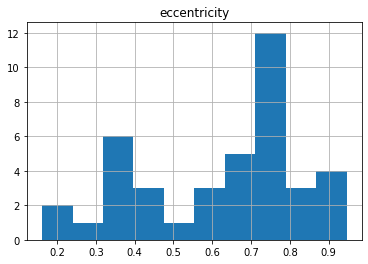

In [69]:
df.hist('eccentricity', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130890d00>]],
      dtype=object)

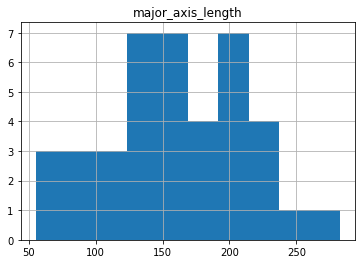

In [71]:
df.hist('major_axis_length', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143e31370>]],
      dtype=object)

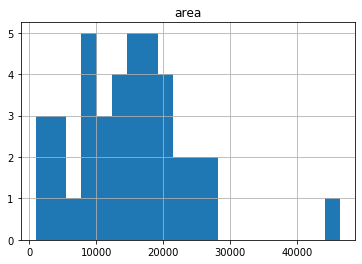

In [74]:
df.hist('area', bins=20)

In [72]:
df.to_csv(path.replace('.nd2', '_shapes.csv'))